In [1]:
import numpy
import tensorflow
import scipy
import tables
import gensim

print("NumPy version:", numpy.__version__)
print("TensorFlow version:", tensorflow.__version__)
print("SciPy version:", scipy.__version__)
print("Tables version:", tables.__version__)
print("Gensim version:", gensim.__version__)

NumPy version: 1.26.0
TensorFlow version: 2.18.0
SciPy version: 1.13.1
Tables version: 3.10.1
Gensim version: 4.3.3


In [18]:
# Import des modules spécifiques de Keras
from tensorflow.keras import layers, models
# Import de train_test_split depuis scikit-learn
from sklearn.model_selection import train_test_split
# Import de pyplot depuis matplotlib
from matplotlib import pyplot as plt
# Import de la fonction load_iris depuis sklearn
from sklearn.datasets import load_iris
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Charger les données iris
iris = load_iris()

# Séparer les données (features) et les étiquettes (target)
X = iris.data  # Données des caractéristiques
y = iris.target  # Étiquettes (catégories)

# Afficher les dimensions pour vérification
print("Dimensions des données (X) :", X.shape)
print("Dimensions des étiquettes (y) :", y.shape)

Dimensions des données (X) : (150, 4)
Dimensions des étiquettes (y) : (150,)


In [20]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions pour vérifier la répartition
print("Dimensions de X_train:", X_train.shape)
print("Dimensions de X_test:", X_test.shape)
print("Dimensions de y_train:", y_train.shape)
print("Dimensions de y_test:", y_test.shape)

Dimensions de X_train: (120, 4)
Dimensions de X_test: (30, 4)
Dimensions de y_train: (120,)
Dimensions de y_test: (30,)


In [21]:
# Construction du modèle séquentiel avec une couche d'entrée explicite
model = Sequential([
    Input(shape=(4,)),               # Couche d'entrée avec shape (4,)
    Dense(10, activation='relu'),    # Première couche dense avec 10 neurones et activation ReLU
    Dense(3, activation='softmax')   # Couche de sortie avec 3 neurones et activation softmax
])

# Afficher le résumé du modèle pour vérifier la structure
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compiler le modèle
model.compile(optimizer='adam',               # Optimiseur Adam
              loss='sparse_categorical_crossentropy',  # Fonction de perte pour des étiquettes non one-hot encodées
              metrics=['accuracy'])           # Mesure de performance : precision (accuracy)

In [25]:
# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6592 - loss: 0.7146 - val_accuracy: 0.7000 - val_loss: 0.6964
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6560 - loss: 0.6995 - val_accuracy: 0.7000 - val_loss: 0.6896
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6415 - loss: 0.7106 - val_accuracy: 0.7000 - val_loss: 0.6829
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6821 - loss: 0.6802 - val_accuracy: 0.7000 - val_loss: 0.6760
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6435 - loss: 0.6950 - val_accuracy: 0.7000 - val_loss: 0.6700
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6112 - loss: 0.6992 - val_accuracy: 0.7000 - val_loss: 0.6646
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6810 - loss: 0.6609 - val_accuracy: 0.7000 - val_loss: 0.6580
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6592 - loss: 0.6599 - val_accuracy: 0.7000 - val_loss: 0.6523


In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Loss on test set: {test_loss}")
print(f"Accuracy on test set: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8000 - loss: 0.4931
Loss on test set: 0.4931359887123108
Accuracy on test set: 0.800000011920929


In [28]:
# Récupérer les prédictions de probabilité
pred_probabilities = model.predict(X_test)

# Obtenir les classes prédites en prenant l'indice de la probabilité maximale
pred_y = np.argmax(pred_probabilities, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


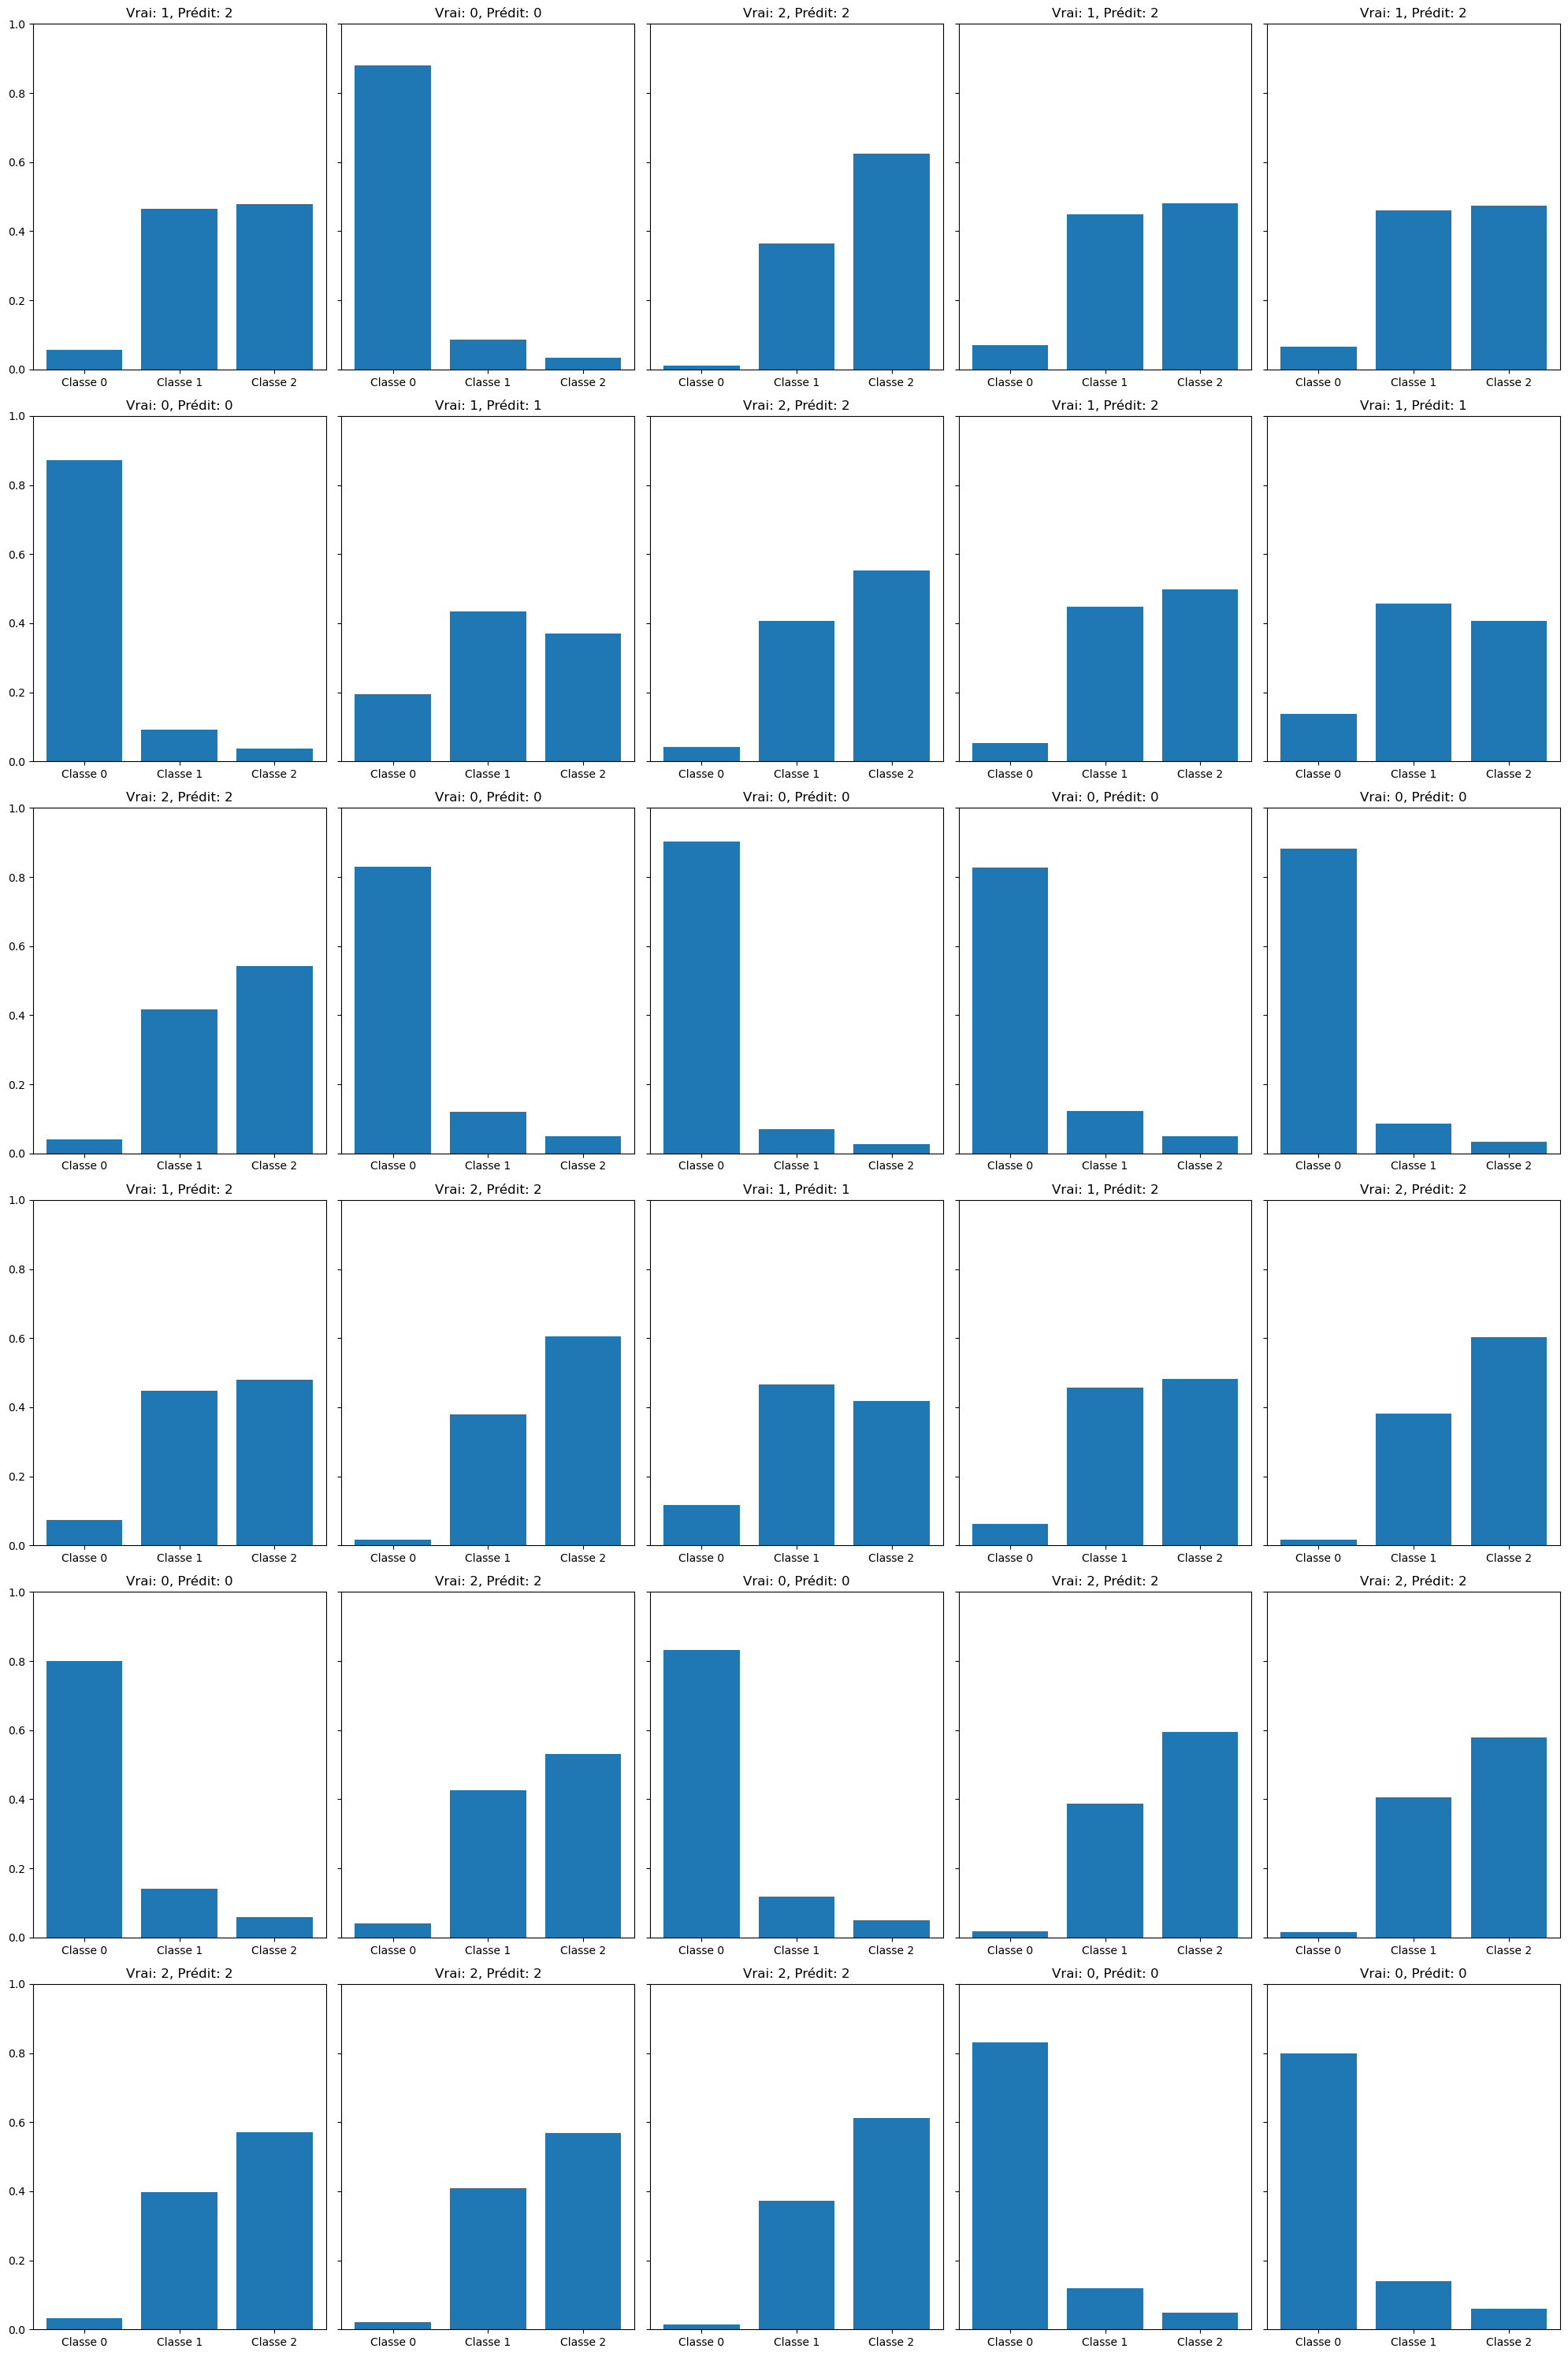

In [32]:
# Définir le nombre de colonnes et lignes pour répartir les sous-graphes
cols = 5  # Nombre de sous-graphes par ligne
rows = (num_samples + cols - 1) // cols  # Calculer le nombre de lignes nécessaires

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows), sharey=True)

# Remplir les sous-graphes avec les prédictions
for i in range(num_samples):
    class_probabilities = pred_probabilities[i]
    true_class = y_test[i]
    predicted_class = pred_y[i]
    
    row, col = divmod(i, cols)
    axes[row, col].bar(range(3), class_probabilities, tick_label=["Classe 0", "Classe 1", "Classe 2"])
    axes[row, col].set_title(f"Vrai: {true_class}, Prédit: {predicted_class}")
    axes[row, col].set_ylim(0, 1)

# Cacher les sous-graphes vides si le nombre d'échantillons n'est pas un multiple de `cols`
for j in range(num_samples, rows * cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()